In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter, AutoDateLocator
from matplotlib.transforms import Bbox

# Assuming df is your DataFrame containing datetime and ppl columns
df = pd.read_csv("vital_numbers.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

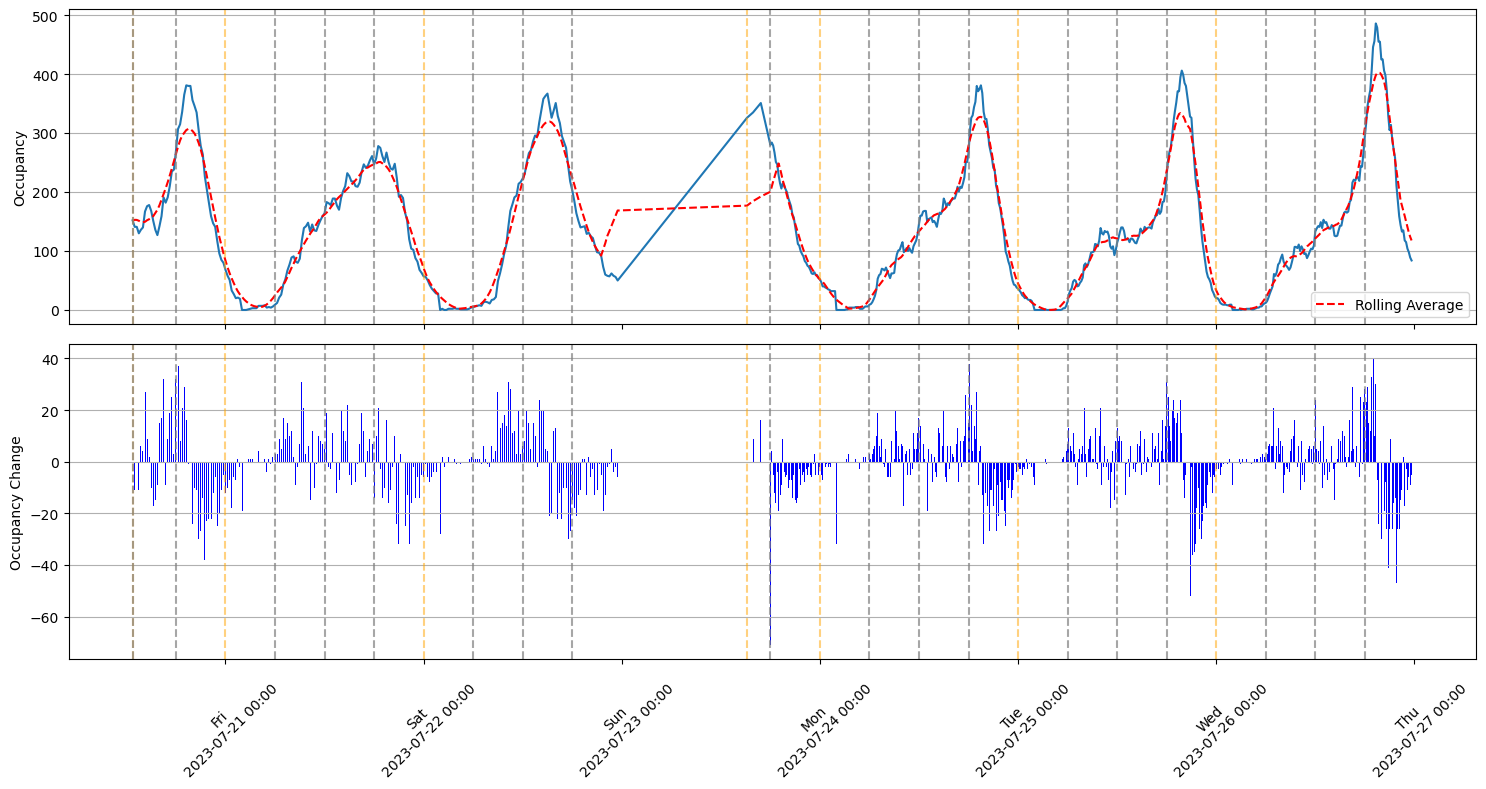

In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.dates import date2num, DateFormatter, AutoDateLocator

# # Assuming df is your DataFrame containing datetime and ppl columns
# df["datetime"] = pd.to_datetime(df["datetime"])  # Convert "datetime" column to datetime format

# # Step 1: Sort the DataFrame by datetime to ensure proper ordering
# df = df.sort_values(by="datetime")

# Step 2: Calculate the difference (delta) in occupancy between consecutive time intervals
# df["delta_ppl"] = df["ppl"].diff()

# Step 3: Apply a rolling window to reset delta calculation for data gaps
def find_data_gaps(dataframe, gap_threshold_hours):
    gap_indices = []
    last_valid_index = None
    for index, row in dataframe.iterrows():
        if last_valid_index is not None:
            time_difference = (row["datetime"] - dataframe.loc[last_valid_index, "datetime"]).total_seconds() / 3600.0
            if time_difference > gap_threshold_hours:
                gap_indices.append(index - 1)
                gap_indices.append(index)
        last_valid_index = index
    return gap_indices

gap_threshold_hours = 12
df["delta_ppl"] = df.groupby((df["datetime"].diff() > pd.Timedelta(hours=gap_threshold_hours)).cumsum())["ppl"].diff()

# Step 4: Calculate the rolling average of the occupancy
rolling_window = 18  # Adjust the rolling window size as needed
df["rolling_avg"] = df["ppl"].rolling(window=rolling_window, min_periods=1, center=True).mean()

# Step 5: Create the plot
fig, ax = plt.subplots(figsize=(15, 8), nrows=2, sharex=True)

# Step 6: Plot the line graph
ax[0].plot(df["datetime"], df["ppl"])
ax[0].plot(df["datetime"], df["rolling_avg"], color='red', linestyle='dashed', label='Rolling Average')
ax[0].grid(axis="y")
ax[0].set_ylabel("Occupancy")
ax[0].legend()

# Step 7: Plot the delta (difference) plot
ax[1].bar(df["datetime"], df["delta_ppl"], color='blue', width=0.005)
ax[1].grid(axis="y")
ax[1].set_ylabel("Occupancy Change")

# Step 8: Adding vertical lines to demarcate days of the week
day_timestamps = [date2num(df[df["datetime"].dt.dayofweek == day]["datetime"].iloc[0]) if not df[df["datetime"].dt.dayofweek == day].empty else None for day in range(7)]

for timestamp in day_timestamps:
    if timestamp is not None:
        ax[0].axvline(timestamp, color='orange', linestyle='--', alpha=0.5)
        ax[1].axvline(timestamp, color='orange', linestyle='--', alpha=0.5)

# Step 9: Adding vertical lines to demarcate specific hours of the day for each day of the week
hours_of_interest = [6, 12, 18]
hour_timestamps = [[date2num(df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)]["datetime"].iloc[0]) if not df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)].empty else None for hour in hours_of_interest] for day in range(7)]

for day in range(7):
    for timestamp in hour_timestamps[day]:
        if timestamp is not None:
            ax[0].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)
            ax[1].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)

# Step 10: Format x-axis as datetime
date_formatter = DateFormatter('%a\n%Y-%m-%d %H:%M')
ax[1].xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [3]:
def plot_data_with_gaps(dataframe, gap_indices):
    # Convert datetime column to pandas datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(dataframe["datetime"]):
        dataframe["datetime"] = pd.to_datetime(dataframe["datetime"])

    # Sort the dataframe based on datetime (important for correct plot)
    dataframe.sort_values(by="datetime", inplace=True)

    # Initialize the figure and axis
    fig, ax = plt.subplots()

    # Plotting data with gaps
    last_gap_index = None
    for index, row in dataframe.iterrows():
        if last_gap_index is not None:
            if index - last_gap_index > 1:
                ax.plot(dataframe.loc[last_gap_index:index - 1, "datetime"], dataframe.loc[last_gap_index:index - 1, "data"], label="Data Segment")
            last_gap_index = None

        ax.plot(row["datetime"], row["data"], marker="o", color="blue", label="Data Point")
        if index in gap_indices:
            last_gap_index = index

    # Add labels, title, legend, etc. to the plot
    ax.set_xlabel("Datetime")
    ax.set_ylabel("Data")
    ax.set_title("Data with Gaps")
    ax.legend()

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# first response

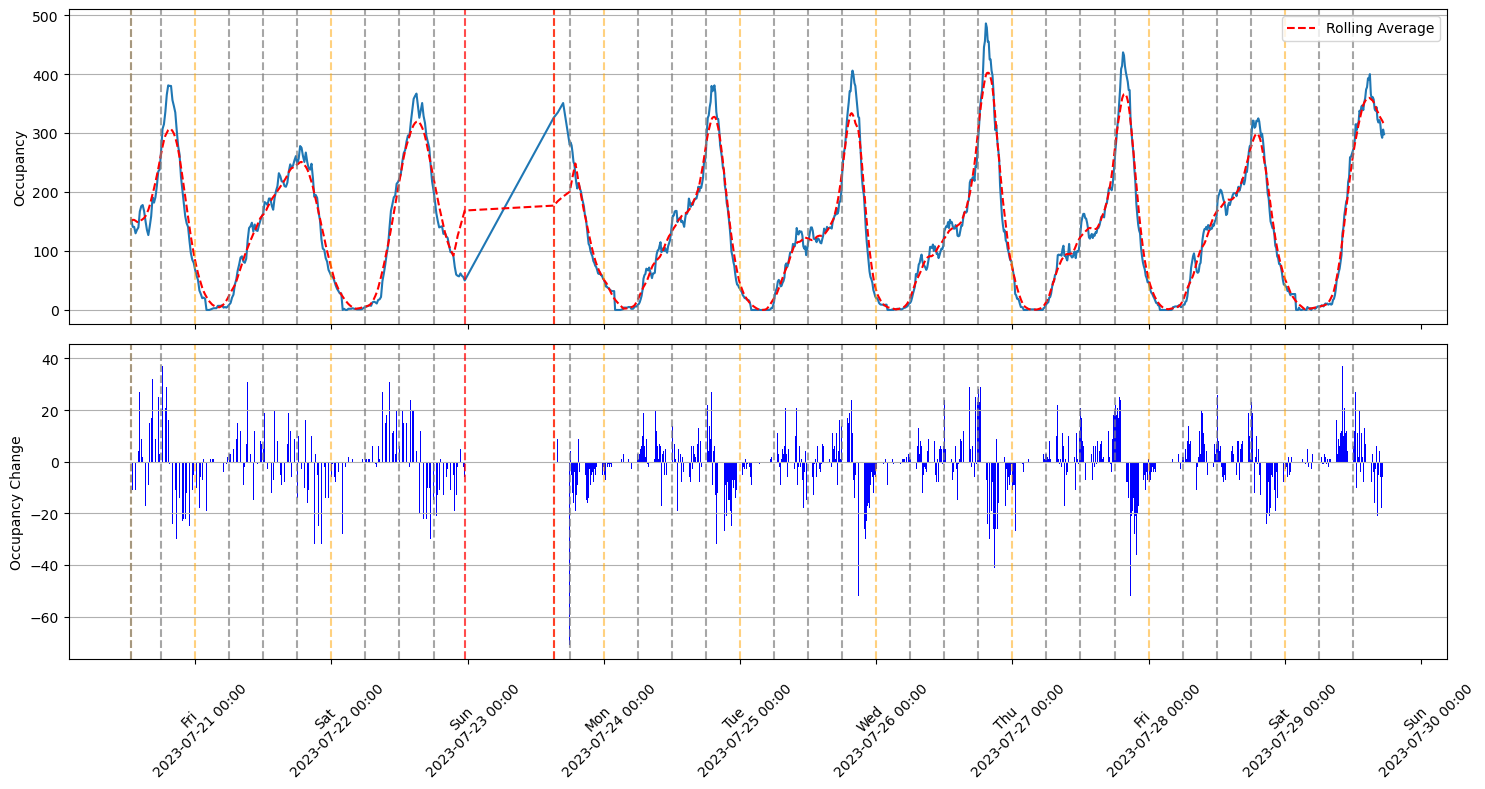

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter

def find_data_gaps(dataframe, gap_threshold_hours):
    gap_indices = []
    last_valid_index = None
    for index, row in dataframe.iterrows():
        if last_valid_index is not None:
            time_difference = (row["datetime"] - dataframe.loc[last_valid_index, "datetime"]).total_seconds() / 3600.0
            if time_difference > gap_threshold_hours:
                gap_indices.append(index - 1)
                gap_indices.append(index)
        last_valid_index = index
    return gap_indices

def plot_data_with_gaps(dataframe, gap_indices):
    # Convert datetime column to pandas datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(dataframe["datetime"]):
        dataframe["datetime"] = pd.to_datetime(dataframe["datetime"])

    # Sort the dataframe based on datetime (important for correct plot)
    dataframe.sort_values(by="datetime", inplace=True)

    # Step 5: Create the plot
    fig, ax = plt.subplots(figsize=(15, 8), nrows=2, sharex=True)

    # Step 6: Plot the line graph
    ax[0].plot(dataframe["datetime"], dataframe["ppl"])
    ax[0].plot(dataframe["datetime"], dataframe["rolling_avg"], color='red', linestyle='dashed', label='Rolling Average')
    ax[0].grid(axis="y")
    ax[0].set_ylabel("Occupancy")
    ax[0].legend()

    # Step 7: Plot the delta (difference) plot
    ax[1].bar(dataframe["datetime"], dataframe["delta_ppl"], color='blue', width=0.005)
    ax[1].grid(axis="y")
    ax[1].set_ylabel("Occupancy Change")


    # Step 8: Adding vertical lines to demarcate days of the week
    day_timestamps = dataframe.groupby(dataframe["datetime"].dt.date)["datetime"].min()
    for timestamp in day_timestamps:
        if timestamp is not None:
            ax[0].axvline(date2num(timestamp), color='orange', linestyle='--', alpha=0.5)
            ax[1].axvline(date2num(timestamp), color='orange', linestyle='--', alpha=0.5)

    # Step 9: Adding vertical lines to demarcate specific hours of the day for each day of the week
    hours_of_interest = [6, 12, 18]
    
    unique_dates = df["datetime"].dt.date.unique()
    for unique_date in unique_dates:
        for hour in hours_of_interest:
            # Extracting the specific hour from the dataframe for the current date
            timestamp = dataframe[(dataframe['datetime'].dt.date == unique_date) & 
                                  (dataframe['datetime'].dt.hour == hour)]['datetime'].min()

            if pd.notnull(timestamp):
                ax[0].axvline(date2num(timestamp), color='gray', linestyle='--', alpha=0.7)
                ax[1].axvline(date2num(timestamp), color='gray', linestyle='--', alpha=0.7)

    # unique_days_of_week = dataframe["datetime"].dt.dayofweek.unique()
    # for day_of_week in unique_days_of_week:
    #     day_data = dataframe[dataframe["datetime"].dt.dayofweek == day_of_week]
    #     for hour in hours_of_interest:
    #         hour_data = day_data[day_data["datetime"].dt.hour == hour]
    #         if not hour_data.empty:
    #             timestamp = date2num(hour_data["datetime"].iloc[0])
    #             ax[0].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)
    #             ax[1].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)


    # Step 10: Format x-axis as datetime
    date_formatter = DateFormatter('%a\n%Y-%m-%d %H:%M')
    ax[1].xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=45)

    # Step 11: Adding gap lines
    for gap_index in gap_indices:
        ax[0].axvline(date2num(dataframe.loc[gap_index, "datetime"]), color='red', linestyle='--', alpha=0.7)
        ax[1].axvline(date2num(dataframe.loc[gap_index, "datetime"]), color='red', linestyle='--', alpha=0.7)
    

    
    plt.tight_layout()
    plt.show()

# Sample usage:
# Assuming you have the DataFrame named 'df' with columns "datetime", "ppl", "delta_ppl", and "rolling_avg"
gap_threshold_hours = 12
df["delta_ppl"] = df.groupby((df["datetime"].diff() > pd.Timedelta(hours=gap_threshold_hours)).cumsum())["ppl"].diff()

# Step 4: Calculate the rolling average of the occupancy
rolling_window = 18  # Adjust the rolling window size as needed
df["rolling_avg"] = df["ppl"].rolling(window=rolling_window, min_periods=1, center=True).mean()

# Find gap indices using the find_data_gaps function
gap_indices = find_data_gaps(df, gap_threshold_hours)

# Plot the data with gaps
plot_data_with_gaps(df, gap_indices)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter

# Your existing functions: find_data_gaps and plot_data_with_gaps

# ... (Previous code)

def plot_data_with_gaps(dataframe, gap_indices):
    # ... (Previous code)

    # Step 8: Adding vertical lines to demarcate days of the week
    unique_days = dataframe["datetime"].dt.dayofweek.unique()
    day_timestamps = [date2num(dataframe[dataframe["datetime"].dt.dayofweek == day]["datetime"].iloc[0]) if day in unique_days and not dataframe[dataframe["datetime"].dt.dayofweek == day].empty else None for day in unique_days]

    for timestamp in day_timestamps:
        if timestamp is not None:
            ax[0].axvline(timestamp, color='orange', linestyle='--', alpha=0.5)
            ax[1].axvline(timestamp, color='orange', linestyle='--', alpha=0.5)

    # Step 9: Adding vertical lines to demarcate specific hours of the day for each day of the week
    hours_of_interest = [6, 12, 18]
    hour_timestamps = [[date2num(dataframe[(dataframe["datetime"].dt.dayofweek == day) & (dataframe["datetime"].dt.hour == hour)]["datetime"].iloc[0]) if day in unique_days and not dataframe[(dataframe["datetime"].dt.dayofweek == day) & (dataframe["datetime"].dt.hour == hour)].empty else None for hour in hours_of_interest] for day in unique_days]

    for day in unique_days:
        for timestamp in hour_timestamps[day]:
            if timestamp is not None:
                ax[0].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)
                ax[1].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)

    # ... (Rest of the previous code)

# Sample usage:
# Assuming you have the DataFrame named 'df' with columns "datetime", "ppl", "delta_ppl", and "rolling_avg"
gap_threshold_hours = 12
df["delta_ppl"] = df.groupby((df["datetime"].diff() > pd.Timedelta(hours=gap_threshold_hours)).cumsum())["ppl"].diff()

# Step 4: Calculate the rolling average of the occupancy
rolling_window = 18  # Adjust the rolling window size as needed
df["rolling_avg"] = df["ppl"].rolling(window=rolling_window, min_periods=1, center=True).mean()

# Find gap indices using the find_data_gaps function
gap_indices = find_data_gaps(df, gap_threshold_hours)

# Plot the data with gaps
plot_data_with_gaps(df, gap_indices)


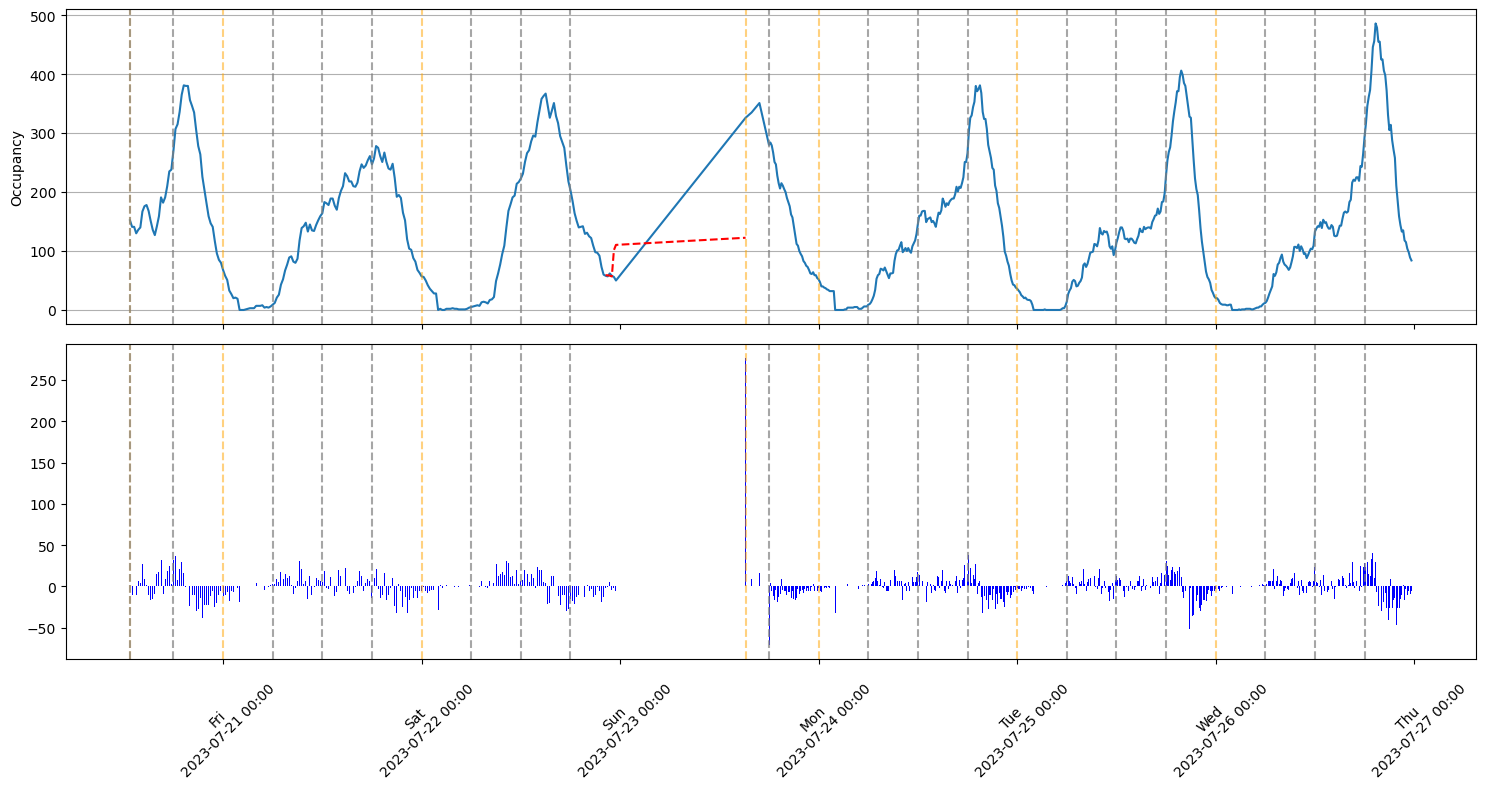

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter, AutoDateLocator

# Assuming df is your DataFrame containing datetime and ppl columns
df["datetime"] = pd.to_datetime(df["datetime"])  # Convert "datetime" column to datetime format

# Function to identify data gaps based on a specific criteria
def find_data_gaps(dataframe, gap_threshold_hours):
    gap_indices = []
    last_valid_index = None
    for index, row in dataframe.iterrows():
        if last_valid_index is not None:
            time_difference = (row["datetime"] - dataframe.loc[last_valid_index, "datetime"]).total_seconds() / 3600.0
            if time_difference > gap_threshold_hours:
                gap_indices.append(index - 1)
        last_valid_index = index
    return gap_indices

# Example usage of the function to find data gaps with a threshold of 12 hours
gap_threshold_hours = 12
gap_indices = find_data_gaps(df, gap_threshold_hours)

# Step 1: Create the plot
fig, ax = plt.subplots(figsize=(15, 8), nrows=2, sharex=True)

# Step 2: Plot the general occupancy graph
ax[0].plot(df["datetime"], df["ppl"])
ax[0].grid(axis="y")
ax[0].set_ylabel("Occupancy")

# Step 3: Plot the rolling average for each segment
rolling_window = 6  # Adjust the rolling window size as needed
for gap_index in gap_indices:
    # Calculate the rolling average for each segment (before and after the gap)
    start_index = max(gap_index - rolling_window + 1, 0)  # Handle start index boundary
    end_index = min(gap_index + 1, len(df))  # Handle end index boundary
    df_segment = df.loc[start_index:end_index].copy()
    df_segment["rolling_avg"] = df_segment["ppl"].rolling(window=rolling_window, min_periods=1, center=True).mean()
    ax[0].plot(df_segment["datetime"], df_segment["rolling_avg"], color='red', linestyle='dashed', label='Rolling Average')

# Step 4: Plot the delta (difference) plot
ax[1].bar(df["datetime"], df["ppl"].diff(), color='blue', width=0.005)

# Step 5: Adding vertical lines to demarcate days of the week
day_timestamps = [date2num(df[df["datetime"].dt.dayofweek == day]["datetime"].iloc[0]) if not df[df["datetime"].dt.dayofweek == day].empty else None for day in range(7)]

for timestamp in day_timestamps:
    if timestamp is not None:
        ax[0].axvline(timestamp, color='orange', linestyle='--', alpha=0.5)
        ax[1].axvline(timestamp, color='orange', linestyle='--', alpha=0.5)

# Step 6: Adding vertical lines to demarcate specific hours of the day for each day of the week
hours_of_interest = [6, 12, 18]
hour_timestamps = [[date2num(df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)]["datetime"].iloc[0]) if not df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)].empty else None for hour in hours_of_interest] for day in range(7)]

for day in range(7):
    for timestamp in hour_timestamps[day]:
        if timestamp is not None:
            ax[0].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)
            ax[1].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)

# Step 7: Format x-axis as datetime
date_formatter = DateFormatter('%a\n%Y-%m-%d %H:%M')
ax[1].xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


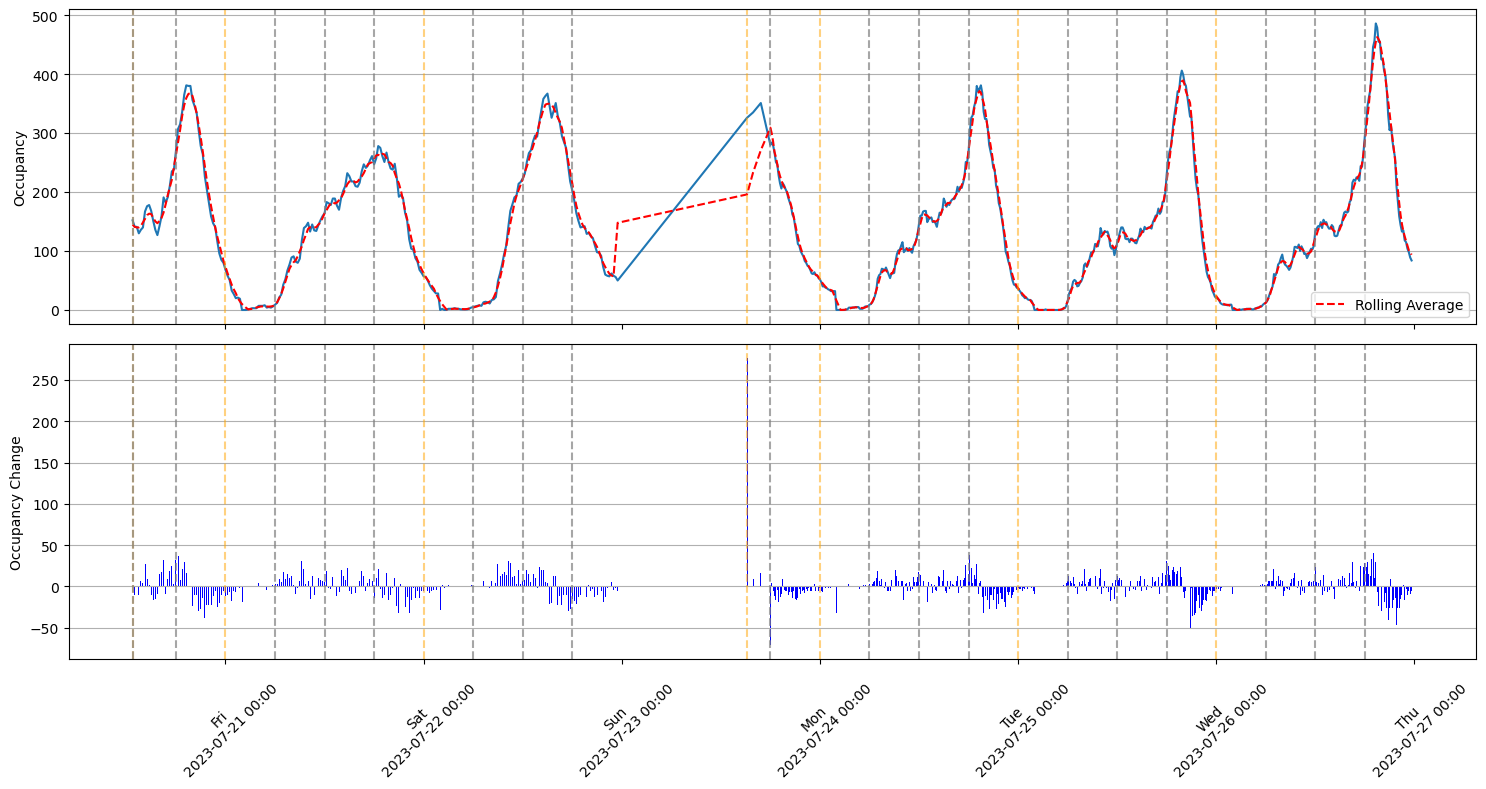

In [9]:
# Function to identify data gaps based on a specific criteria
def find_data_gaps(dataframe, gap_threshold_hours):
    gap_indices = []
    last_valid_index = None
    for index, row in dataframe.iterrows():
        if last_valid_index is not None:
            time_difference = (row["datetime"] - dataframe.loc[last_valid_index, "datetime"]).total_seconds() / 3600.0
            if time_difference > gap_threshold_hours:
                gap_indices.append(index - 1)
        last_valid_index = index
    return gap_indices

# Example usage of the function to find data gaps with a threshold of 12 hours
gap_threshold_hours = 12
gap_indices = find_data_gaps(df, gap_threshold_hours)

# Step 1: Create the plot
fig, ax = plt.subplots(figsize=(15, 8), nrows=2, sharex=True)

# Step 2: Calculate the rolling average for the entire DataFrame
rolling_window = 6  # Adjust the rolling window size as needed
df["rolling_avg"] = df["ppl"].rolling(window=rolling_window, min_periods=1, center=True).mean()

# Step 3: Plot the general occupancy graph
ax[0].plot(df["datetime"], df["ppl"])
ax[0].plot(df["datetime"], df["rolling_avg"], color='red', linestyle='dashed', label='Rolling Average')
ax[0].grid(axis="y")
ax[0].set_ylabel("Occupancy")
ax[0].legend()

# Step 4: Plot the delta (difference) plot
ax[1].bar(df["datetime"], df["ppl"].diff(), color='blue', width=0.005)
ax[1].grid(axis="y")
ax[1].set_ylabel("Occupancy Change")

# Step 5: Adding vertical lines to demarcate days of the week
day_timestamps = [date2num(df[df["datetime"].dt.dayofweek == day]["datetime"].iloc[0]) if not df[df["datetime"].dt.dayofweek == day].empty else None for day in range(7)]

for timestamp in day_timestamps:
    if timestamp is not None:
        ax[0].axvline(timestamp, color='orange', linestyle='--', alpha=0.5)
        ax[1].axvline(timestamp, color='orange', linestyle='--', alpha=0.5)

# Step 6: Adding vertical lines to demarcate specific hours of the day for each day of the week
hours_of_interest = [6, 12, 18]
hour_timestamps = [[date2num(df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)]["datetime"].iloc[0]) if not df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)].empty else None for hour in hours_of_interest] for day in range(7)]

for day in range(7):
    for timestamp in hour_timestamps[day]:
        if timestamp is not None:
            ax[0].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)
            ax[1].axvline(timestamp, color='gray', linestyle='--', alpha=0.7)

# Step 7: Format x-axis as datetime
date_formatter = DateFormatter('%a\n%Y-%m-%d %H:%M')
ax[1].xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



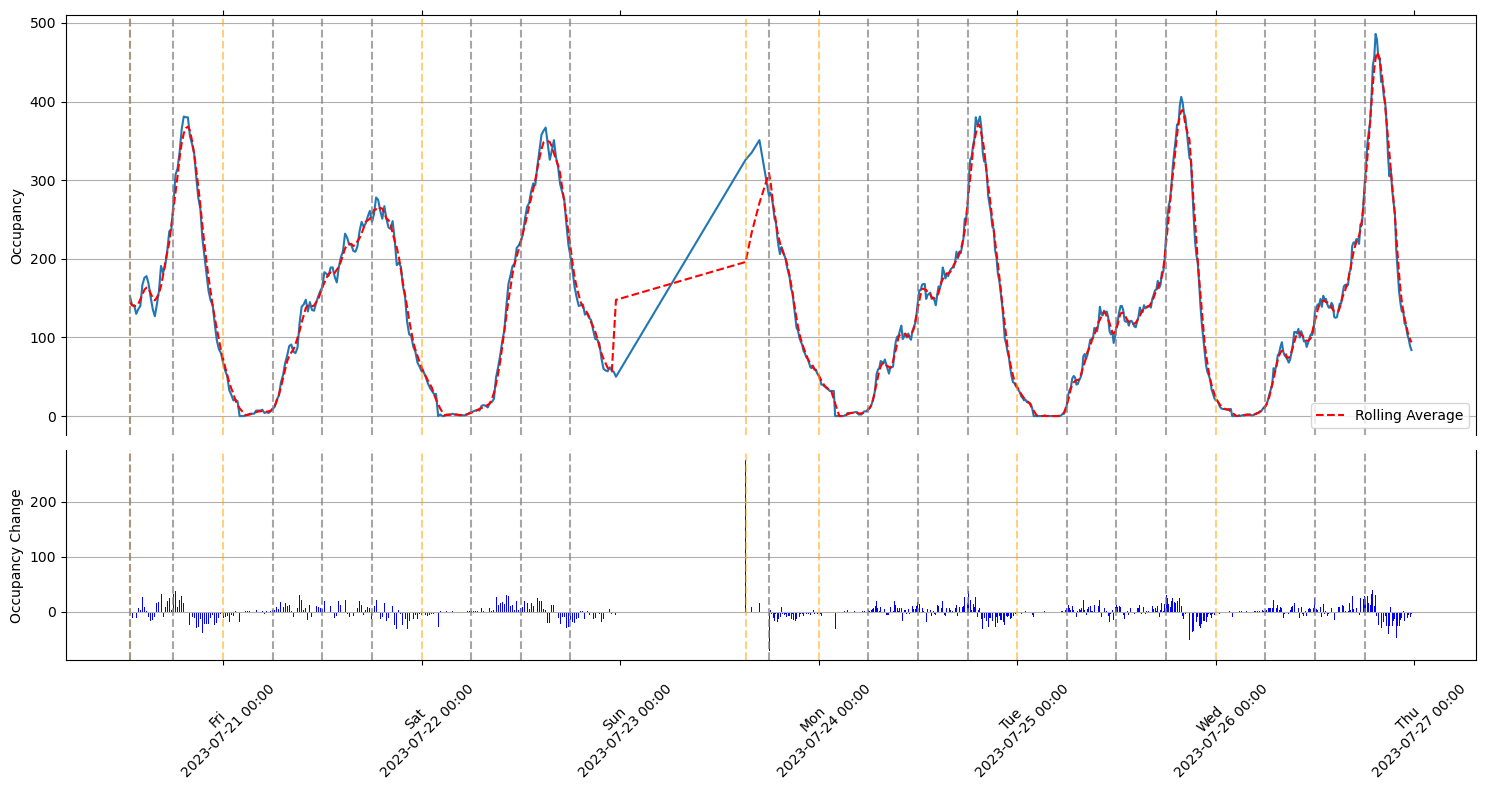

In [10]:
def find_data_gaps(dataframe, gap_threshold_hours):
    gap_indices = []
    last_valid_index = None
    for index, row in dataframe.iterrows():
        if last_valid_index is not None:
            time_difference = (row["datetime"] - dataframe.loc[last_valid_index, "datetime"]).total_seconds() / 3600.0
            if time_difference > gap_threshold_hours:
                gap_indices.append(index - 1)
        last_valid_index = index
    return gap_indices

# Example usage of the function to find data gaps with a threshold of 12 hours
gap_threshold_hours = 12
gap_indices = find_data_gaps(df, gap_threshold_hours)

# Step 1: Create the plot
fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), nrows=2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Step 2: Calculate the rolling average for the entire DataFrame
rolling_window = 6  # Adjust the rolling window size as needed
df["rolling_avg"] = df["ppl"].rolling(window=rolling_window, min_periods=1, center=True).mean()

# Step 3: Plot the general occupancy graph
ax1.plot(df["datetime"], df["ppl"])
ax1.plot(df["datetime"], df["rolling_avg"], color='red', linestyle='dashed', label='Rolling Average')
ax1.grid(axis="y")
ax1.set_ylabel("Occupancy")
ax1.legend()

# Step 4: Adding vertical lines to demarcate days of the week
day_timestamps = [date2num(df[df["datetime"].dt.dayofweek == day]["datetime"].iloc[0]) if not df[df["datetime"].dt.dayofweek == day].empty else None for day in range(7)]

for timestamp in day_timestamps:
    if timestamp is not None:
        ax1.axvline(timestamp, color='orange', linestyle='--', alpha=0.5)

# Step 5: Adding vertical lines to demarcate specific hours of the day for each day of the week
hours_of_interest = [6, 12, 18]
hour_timestamps = [[date2num(df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)]["datetime"].iloc[0]) if not df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)].empty else None for hour in hours_of_interest] for day in range(7)]

for day in range(7):
    for timestamp in hour_timestamps[day]:
        if timestamp is not None:
            ax1.axvline(timestamp, color='gray', linestyle='--', alpha=0.7)

# Step 6: Format x-axis as datetime
date_formatter = DateFormatter('%a\n%Y-%m-%d %H:%M')
ax1.xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)

# Step 7: Plot the delta (difference) plot
ax2.bar(df["datetime"], df["ppl"].diff(), color='blue', width=0.005)
ax2.grid(axis="y")
ax2.set_ylabel("Occupancy Change")

# Step 8: Hide the spines between ax1 and ax2 (axis break)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Step 9: Adding vertical lines to demarcate days of the week for the delta graph
for timestamp in day_timestamps:
    if timestamp is not None:
        ax2.axvline(timestamp, color='orange', linestyle='--', alpha=0.5)

# Step 10: Adding vertical lines to demarcate specific hours of the day for each day of the week for the delta graph
for day in range(7):
    for timestamp in hour_timestamps[day]:
        if timestamp is not None:
            ax2.axvline(timestamp, color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

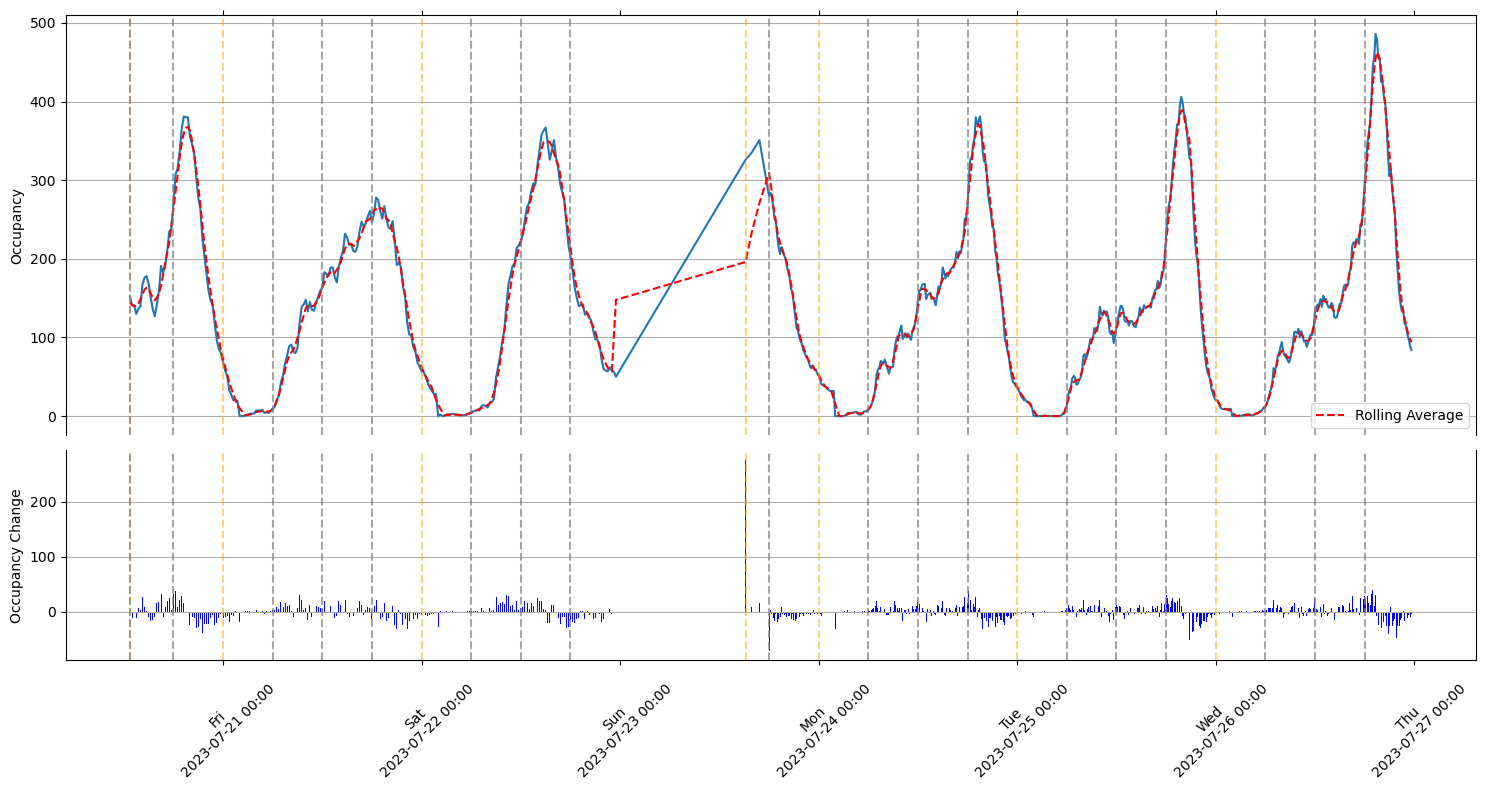

In [11]:

# Function to identify data gaps based on a specific criteria
def find_data_gaps(dataframe, gap_threshold_hours):
    gap_indices = []
    last_valid_index = None
    for index, row in dataframe.iterrows():
        if last_valid_index is not None:
            time_difference = (row["datetime"] - dataframe.loc[last_valid_index, "datetime"]).total_seconds() / 3600.0
            if time_difference > gap_threshold_hours:
                gap_indices.append(index - 1)
        last_valid_index = index
    return gap_indices

# Example usage of the function to find data gaps with a threshold of 12 hours
gap_threshold_hours = 12
gap_indices = find_data_gaps(df, gap_threshold_hours)

# Step 1: Create the plot
fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), nrows=2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Step 2: Calculate the rolling average for the entire DataFrame
rolling_window = 6  # Adjust the rolling window size as needed
df["rolling_avg"] = df["ppl"].rolling(window=rolling_window, min_periods=1, center=True).mean()

# Step 3: Plot the general occupancy graph
ax1.plot(df["datetime"], df["ppl"])
ax1.plot(df["datetime"], df["rolling_avg"], color='red', linestyle='dashed', label='Rolling Average')
ax1.grid(axis="y")
ax1.set_ylabel("Occupancy")
ax1.legend()

# Step 4: Adding vertical lines to demarcate days of the week
day_timestamps = [date2num(df[df["datetime"].dt.dayofweek == day]["datetime"].iloc[0]) if not df[df["datetime"].dt.dayofweek == day].empty else None for day in range(7)]

for timestamp in day_timestamps:
    if timestamp is not None:
        ax1.axvline(timestamp, color='orange', linestyle='--', alpha=0.5)

# Step 5: Adding vertical lines to demarcate specific hours of the day for each day of the week
hours_of_interest = [6, 12, 18]
hour_timestamps = [[date2num(df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)]["datetime"].iloc[0]) if not df[(df["datetime"].dt.dayofweek == day) & (df["datetime"].dt.hour == hour)].empty else None for hour in hours_of_interest] for day in range(7)]

for day in range(7):
    for timestamp in hour_timestamps[day]:
        if timestamp is not None:
            ax1.axvline(timestamp, color='gray', linestyle='--', alpha=0.7)

# Step 6: Format x-axis as datetime
date_formatter = DateFormatter('%a\n%Y-%m-%d %H:%M')
ax1.xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)

# Step 7: Plot the delta (difference) plot
delta = df["ppl"].diff()
delta[gap_indices] = None  # Set outliers to None to handle data gaps
ax2.bar(df["datetime"], delta, color='blue', width=0.005)
ax2.grid(axis="y")
ax2.set_ylabel("Occupancy Change")

# Step 8: Hide the spines between ax1 and ax2 (axis break)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Step 9: Adding vertical lines to demarcate days of the week for the delta graph
for timestamp in day_timestamps:
    if timestamp is not None:
        ax2.axvline(timestamp, color='orange', linestyle='--', alpha=0.5)

# Step 10: Adding vertical lines to demarcate specific hours of the day for each day of the week for the delta graph
for day in range(7):
    for timestamp in hour_timestamps[day]:
        if timestamp is not None:
            ax2.axvline(timestamp, color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [18]:
find_data_gaps(df, 12)

[235, 236]

In [16]:
df.iloc[236]

date                    2023-07-23
day                         Sunday
time                      15:10:23
ppl                            326
datetime       2023-07-23 15:10:23
delta_ppl                      NaN
rolling_avg                  196.0
Name: 236, dtype: object

In [17]:
def find_data_gaps(dataframe, gap_threshold_hours):
    gap_indices = []
    last_valid_index = None
    for index, row in dataframe.iterrows():
        if last_valid_index is not None:
            time_difference = (row["datetime"] - dataframe.loc[last_valid_index, "datetime"]).total_seconds() / 3600.0
            if time_difference > gap_threshold_hours:
                gap_indices.append(index - 1)
                gap_indices.append(index)
        last_valid_index = index
    return gap_indices